In [100]:
import pandas as pd
import matplotlib as plt
import numpy as np
import math

In [101]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df = df.rename(columns={'Occupation': 'Job'})
df.head(3)
# доверительный интервал уровня стресса среди людей от 27 до 40 - 5,5 - 5,96


,Person ID,Gender,Age,Job,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


In [102]:
df = df[(df['Age'] >= 27) & (df['Age'] <= 40)]
df_grouped = df.groupby('Job').aggregate({'Stress Level' : 'mean', 'Sleep Duration' : 'mean'})
df_grouped.head(11)


,Stress Level,Sleep Duration
Job,,
Accountant,4.129032,7.219355
Doctor,7.015385,6.887692
Engineer,4.090909,7.336364
Lawyer,5.033333,7.280000
Nurse,6.000000,6.757143
Sales Representative,8.000000,5.900000
Scientist,7.000000,6.000000
Software Engineer,6.000000,6.750000
Teacher,5.000000,6.900000


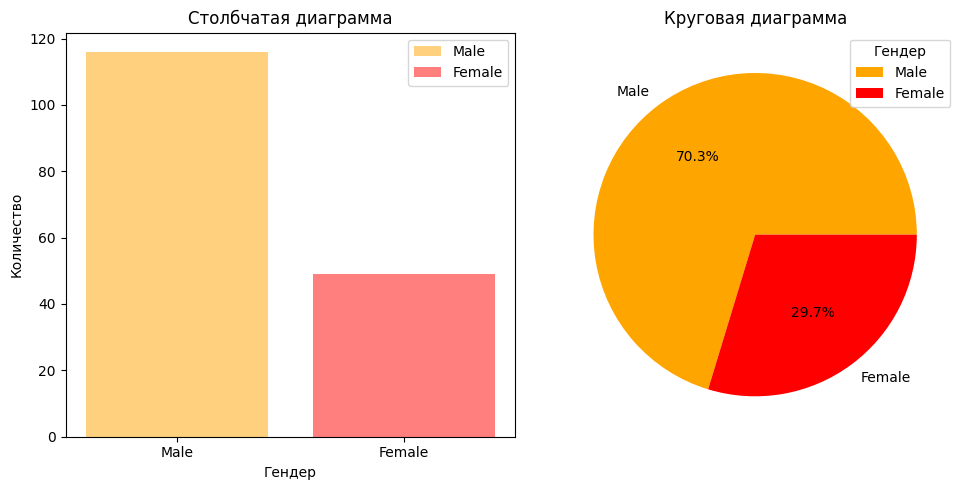

In [99]:

counts_m = df['Gender'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10,5))  # 1 строка, 2 столбца

# 1. Столбчатая диаграмма на axes[0]
axes[0].bar(counts_m.index, counts_m.values, color=['orange', 'red'], alpha=0.5, label=['Male', 'Female'])
axes[0].set_xlabel('Гендер')
axes[0].set_ylabel('Количество')
axes[0].legend()
axes[0].set_title('Столбчатая диаграмма')

# 2. Круговая диаграмма на axes[1]
axes[1].pie(counts_m.values, labels=counts_m.index, colors=['orange', 'red'], autopct='%1.1f%%')
axes[1].set_title('Круговая диаграмма')
axes[1].legend(title='Гендер', loc='upper right')

plt.tight_layout()
plt.show()


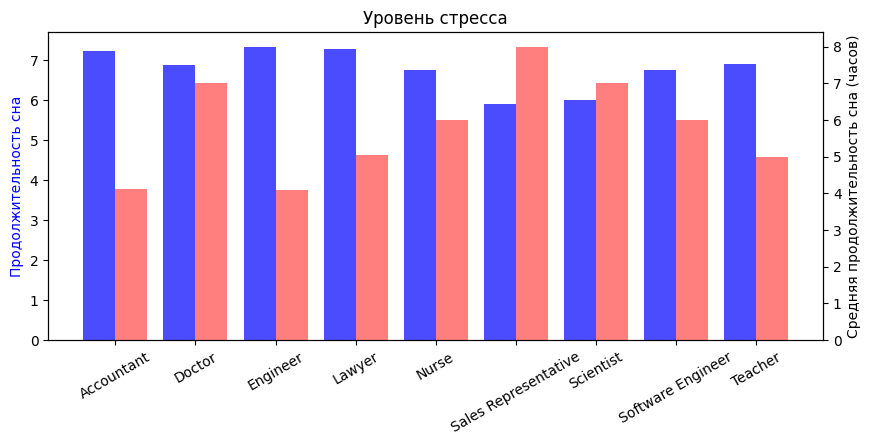

In [4]:
import matplotlib.pyplot as plt
bar_width = 0.4
fig, ax1 = plt.subplots(figsize=(10, 4))
x = np.arange(len(df_grouped.index))
bar1 = plt.bar(x - bar_width/2, df_grouped['Sleep Duration'],width=bar_width, color='blue', alpha=0.7)
ax1.set_ylabel('Продолжительность сна', color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(df_grouped.index, rotation=30)



ax2 = ax1.twinx()
bar2 =plt.bar(x + bar_width/2, df_grouped['Stress Level'], width=bar_width, color='red', alpha=0.5)
plt.title('Уровень стресса')
plt.xlabel('Профессия')
plt.ylabel('Средняя продолжительность сна (часов)')

bars = bar1 + bar2
labels = [bar.get_label() for bar in bars]

plt.show()


In [5]:
df['BMI Category'] = df['BMI Category'].str.lower()
df['BMI Category'] = df['BMI Category'].replace('normal weight', 'normal')



In [6]:
obesity = df.groupby(['BMI Category']).aggregate({'Daily Steps': 'mean', 'Heart Rate': 'mean', 'Quality of Sleep': 'mean', 'Stress Level': 'mean'})
obesity.head(10)


,Daily Steps,Heart Rate,Quality of Sleep,Stress Level
BMI Category,,,,
normal,7014.189189,69.635135,7.263514,5.628378
obese,3183.333333,84.166667,5.333333,6.833333
overweight,4963.636364,76.000000,5.545455,6.454545


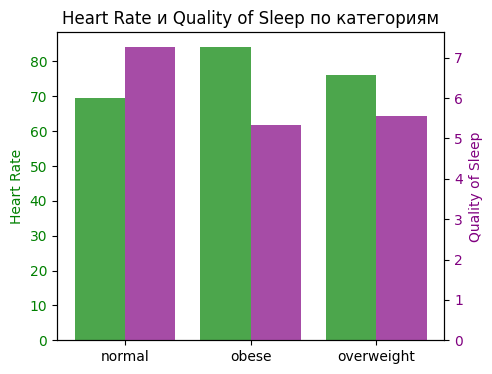

In [7]:


fig, ax1 = plt.subplots(figsize=(5, 4))

# Левая ось Y — Heart Rate
bar_width = 0.4
x = np.arange(len(obesity.index))

bars1 = ax1.bar(x - bar_width/2, obesity['Heart Rate'], width=bar_width, color='green', alpha=0.7, label='Heart Rate')
ax1.set_ylabel('Heart Rate', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticks(x)
ax1.set_xticklabels(obesity.index)

# Правая ось Y — Quality of Sleep
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, obesity['Quality of Sleep'], width=bar_width, color='purple', alpha=0.7, label='Quality of Sleep')
ax2.set_ylabel('Quality of Sleep', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Легенда (объединяем из обеих осей)
bars = bars1 + bars2
labels = [bar.get_label() for bar in bars]


plt.title('Heart Rate и Quality of Sleep по категориям')
plt.show()


In [8]:
sports_by_job = df.groupby('Job').aggregate({'Physical Activity Level': 'mean', 'Stress Level': 'mean'})

sports_by_job.head(10)

,Physical Activity Level,Stress Level
Job,,
Accountant,60.645161,4.129032
Doctor,53.076923,7.015385
Engineer,57.272727,4.090909
Lawyer,61.666667,5.033333
Nurse,46.714286,6.000000
Sales Representative,30.000000,8.000000
Scientist,41.000000,7.000000
Software Engineer,48.000000,6.000000
Teacher,50.000000,5.000000


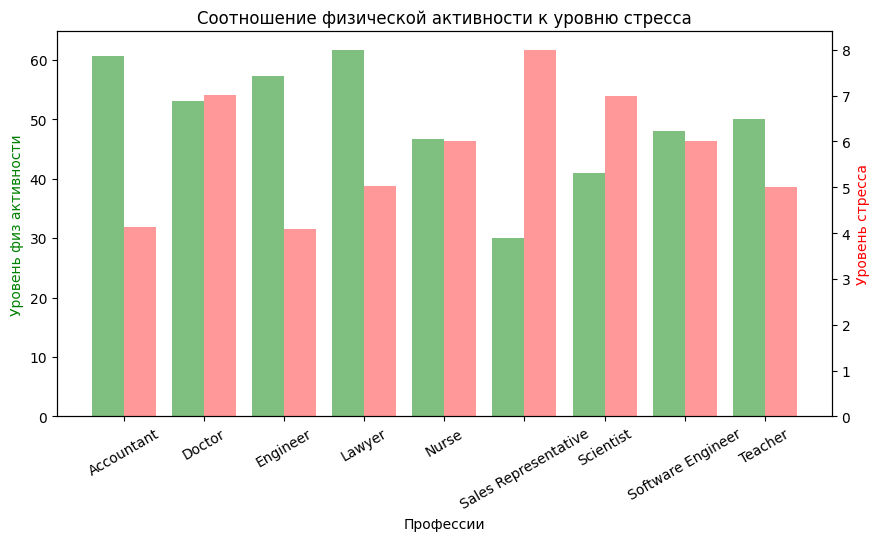

In [9]:
import numpy as np
import matplotlib.pyplot as plt

bar_width = 0.4
x = np.arange(len(sports_by_job.index))

fig, ax1 = plt.subplots(figsize=(10,5))

# Столбцы физической активности — сдвинуты влево
bar1 = ax1.bar(x - bar_width/2, sports_by_job['Physical Activity Level'], 
               width=bar_width, color='green', alpha=0.5)
ax1.set_ylabel('Уровень физ активности', color='green')
ax1.set_xticks(x)
ax1.set_xticklabels(sports_by_job.index, rotation=30)
ax1.set_xlabel('Профессии')

# Вторая ось — уровень стресса, сдвинут вправо
ax2 = ax1.twinx()
bar2 = ax2.bar(x + bar_width/2, sports_by_job['Stress Level'], 
               width=bar_width, color='red', alpha=0.4)
ax2.set_ylabel('Уровень стресса', color='red')

plt.title('Соотношение физической активности к уровню стресса')

plt.show()


In [23]:
df_m = df[(df['Gender'] == 'Male')]
df_f = df[(df['Gender'] == 'Female')]
df_m_grouped = df_m.groupby(['Job']).aggregate({'Stress Level': 'mean'})
df_f_grouped = df_f.groupby(['Job']).aggregate({'Stress Level': 'mean'})


In [44]:
df_m_grouped = df_m_grouped.sort_index()


df_m_grouped.head(10)

,Stress Level
Job,
Accountant,6.000000
Doctor,7.015385
Engineer,4.090909
Lawyer,5.000000
Sales Representative,8.000000
Software Engineer,6.000000
Teacher,6.200000


In [45]:

df_f_grouped = df_f_grouped.sort_index()

df_f_grouped.head(10)

,Stress Level
Job,
Accountant,4.066667
Lawyer,5.500000
Nurse,6.000000
Scientist,7.000000
Teacher,4.000000


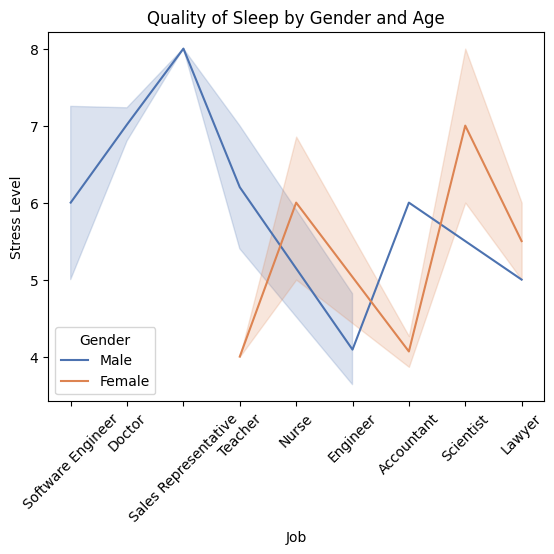

In [79]:
import seaborn as sns

sns.lineplot(x='Job', y='Stress Level',hue='Gender', data=df, palette='deep',)
plt.title('Quality of Sleep by Gender and Age')
plt.xticks(rotation=45)
plt.show()


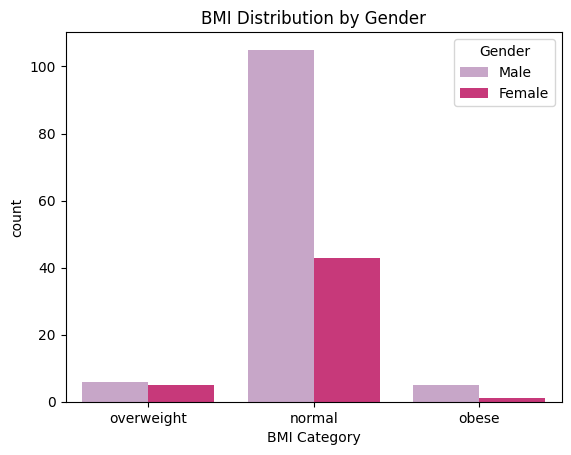

In [80]:
sns.countplot(x='BMI Category', data=df , hue='Gender', palette='PuRd')
plt.title('BMI Distribution by Gender')
plt.show()